In [3]:
from qulab.drivers.AlazarTechDigitizer import Driver
ats = Driver(systemID=1, boardID=1)

In [ ]:
import time
import numpy as np
from qulab.sugar import connect
ats = await connect('ATS19')

In [ ]:
from qulab.sugar import getDHT

dht = await getDHT()
await dht.set('ATS19','tcp://10.122.7.19:55259')
# await dht.get('ATS18')

In [23]:
ats.set(repeats=0, maxlen=20*60*10000)

for i in range(1):
    t = time.strftime('%y%m%d') + '_' + time.strftime("%H%M%S", time.localtime())
    chA, chB = ats.getIQ()
    np.savez(r'D:\QuLabData\row\RTO_%s.npz'%t,chA=chA,chB=chB)

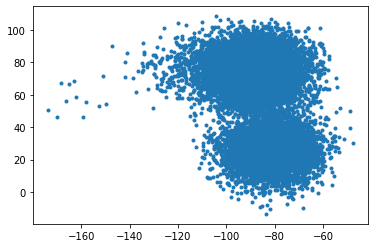

In [24]:
import matplotlib.pyplot as plt
import numpy as np

S = chA+1j*chB
Sx = S[::2,0] 
Sy = S[1::2,0] 
plt.plot(np.real(Sy[::10]), np.imag(Sy[::10]),'.')
#plt.plot(np.real(Sy), np.imag(Sy),'.')
plt.show()

<IPython.core.display.Javascript object>


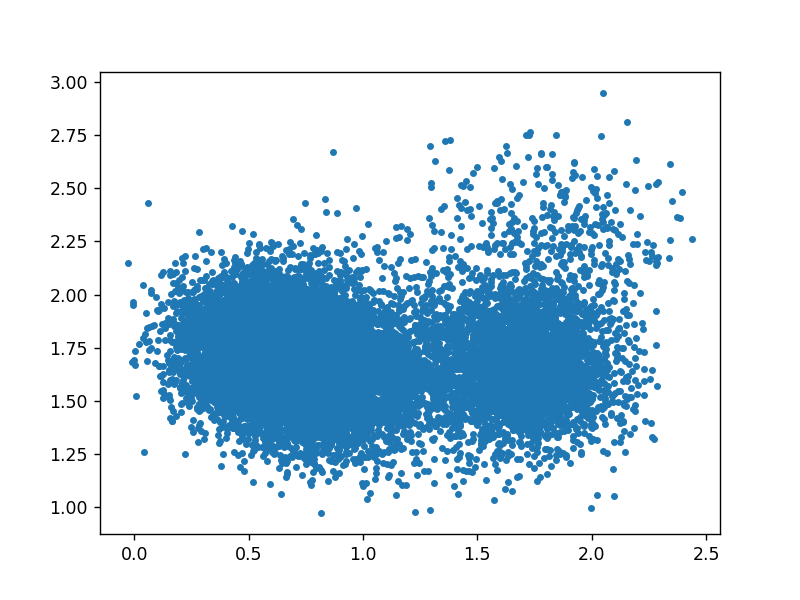

In [25]:


e = np.mean(Sx[np.imag(Sx) > 75]) - np.mean(Sx[np.imag(Sx) < 75])
Sx = S[::2,0] / e
Sy = S[1::2,0] / e

x = 2*(np.real(Sx)<1.3)-1
y = 2*(np.real(Sy)<1.3)-1

plt.plot(np.real(Sx[::1000]), np.imag(Sx[::1000]),'.')
plt.show()

<IPython.core.display.Javascript object>


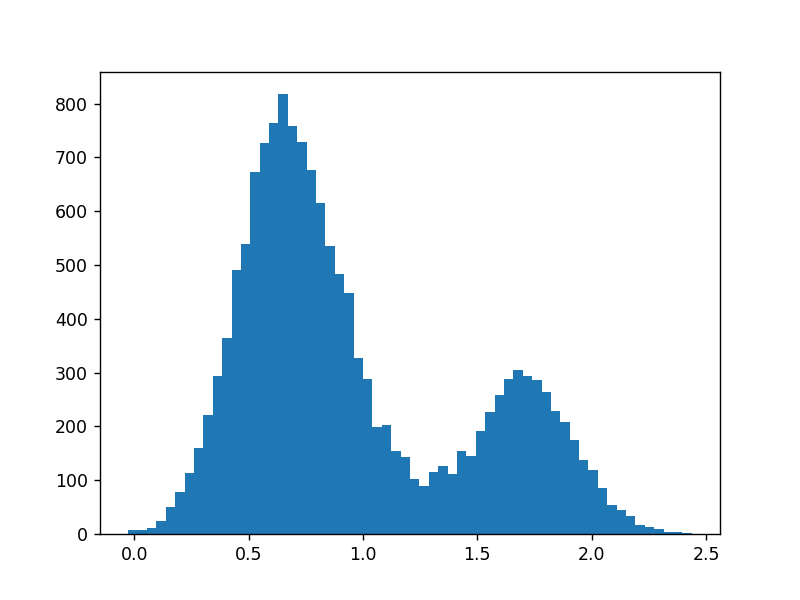

In [27]:
plt.hist(np.real(Sx[::1000]), bins=60)
plt.show()

In [11]:
e = np.mean(Sx[np.imag(Sx) > 75]) - np.mean(Sx[np.imag(Sx) < 75])

<IPython.core.display.Javascript object>


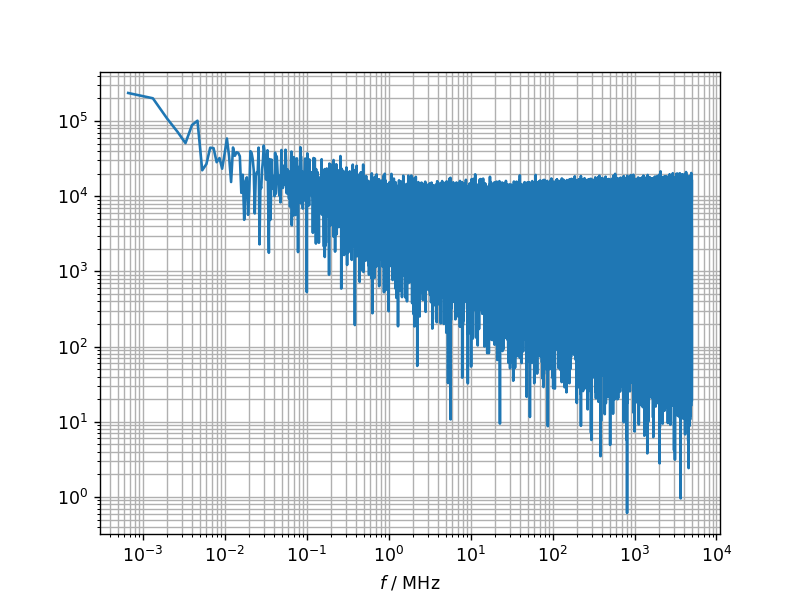

In [28]:
%matplotlib notebook

s = np.fft.fftshift(np.fft.fft(np.arctan2(y,x)))
f = np.fft.fftshift(np.fft.fftfreq(len(y))*10e3)

plt.figure()
plt.loglog(f[f>0], np.abs(s[f>0]))
plt.grid(which='both')
plt.xlabel(r'$f$ / MHz')
plt.show()

In [6]:
import numpy as np
x = np.arange(1000)

In [7]:
x.reshape(100,10).mean(axis=1)

array([  4.5,  14.5,  24.5,  34.5,  44.5,  54.5,  64.5,  74.5,  84.5,
        94.5, 104.5, 114.5, 124.5, 134.5, 144.5, 154.5, 164.5, 174.5,
       184.5, 194.5, 204.5, 214.5, 224.5, 234.5, 244.5, 254.5, 264.5,
       274.5, 284.5, 294.5, 304.5, 314.5, 324.5, 334.5, 344.5, 354.5,
       364.5, 374.5, 384.5, 394.5, 404.5, 414.5, 424.5, 434.5, 444.5,
       454.5, 464.5, 474.5, 484.5, 494.5, 504.5, 514.5, 524.5, 534.5,
       544.5, 554.5, 564.5, 574.5, 584.5, 594.5, 604.5, 614.5, 624.5,
       634.5, 644.5, 654.5, 664.5, 674.5, 684.5, 694.5, 704.5, 714.5,
       724.5, 734.5, 744.5, 754.5, 764.5, 774.5, 784.5, 794.5, 804.5,
       814.5, 824.5, 834.5, 844.5, 854.5, 864.5, 874.5, 884.5, 894.5,
       904.5, 914.5, 924.5, 934.5, 944.5, 954.5, 964.5, 974.5, 984.5,
       994.5])

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = np.load(r'D:\QuLabData\mature/awg3.4385\RTO_191119_174748.npz')
data = np.load(r'D:\QuLabData\row\RTO_191119_174748.npz')
data.files

['chA', 'chB']

In [3]:
chA0, chA1, chB0, chB1 = data['chA0'], data['chA1'], data['chB0'], data['chB1']

In [3]:
chA, chB = data['chA'], data['chB']

In [7]:
Sx = chA0 + 1j*chB0
Sy = chA1 + 1j*chB1

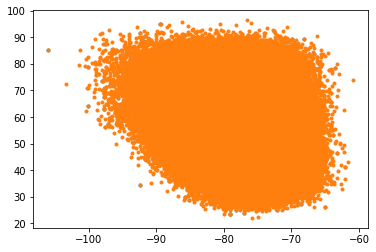

In [5]:
S = chA+1j*chB
Sx = S[::2,0] 
Sy = S[1::2,0] 
Sx = Sx[:-32].reshape(600000,10).mean(axis=1)
Sy = Sy[:-32].reshape(600000,10).mean(axis=1)
plt.plot(np.real(Sy[::10]), np.imag(Sy[::10]),'.')
plt.plot(np.real(Sy), np.imag(Sy),'.')
plt.show()

ValueError: cannot reshape array of size 599968 into shape (600000,10)

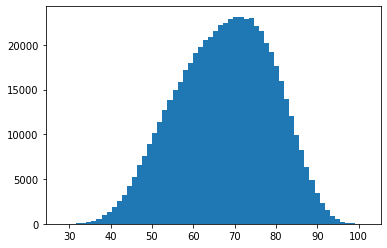

In [9]:
plt.hist(np.imag(Sx), bins=60)
plt.show()

NameError: name 'S' is not defined

<IPython.core.display.Javascript object>


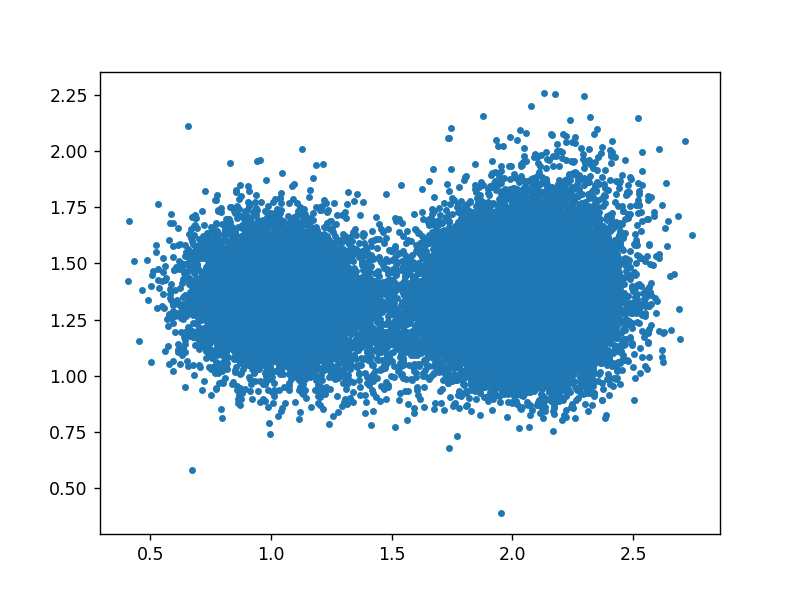

In [55]:
e = np.mean(Sx[np.imag(Sx) > 125]) - np.mean(Sx[np.imag(Sx) < 125])
Sx = S[::2,0] / e
Sy = S[1::2,0] / e

x = 2*(np.real(Sx)<1.3)-1
y = 2*(np.real(Sy)<1.3)-1

plt.plot(np.real(Sx[::100]), np.imag(Sx[::100]),'.')
plt.show()

In [43]:
x

array([-165.85369397, -180.21631332, -174.84469328, ..., -192.78401951,
       -204.32469201, -184.30751065])

<IPython.core.display.Javascript object>


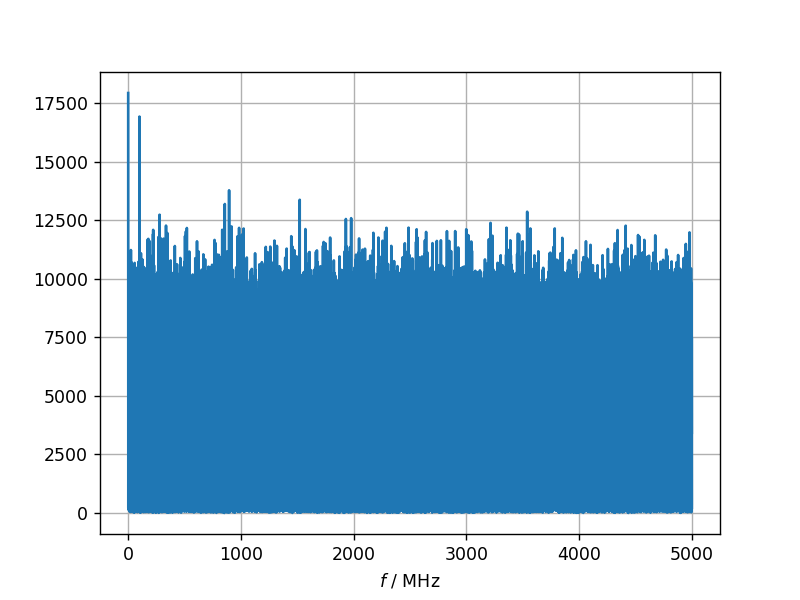

In [56]:
%matplotlib notebook

s = np.fft.fftshift(np.fft.fft(np.arctan2(y,x)))
f = np.fft.fftshift(np.fft.fftfreq(len(y))*10e3)

plt.figure()
plt.plot(f[f>0], np.abs(s[f>0]))
plt.grid(which='both')
plt.xlabel(r'$f$ / MHz')
plt.show()

In [5]:
from sklearn.cluster import KMeans

In [6]:
x,z = np.real(Sy[::100]), np.imag(Sy[::100])
d = list(zip(x,z))
d = np.mat(d)

In [12]:
kmeans = KMeans(n_clusters=2,max_iter=100,tol=0.001)

kmeans.fit(d)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.001, verbose=0)

In [20]:
data1 = np.load(r'D:\QuLabData\RTO_191117_173705.npz')
chA1, chB1 = data1['chA'], data['chB']

In [21]:
S1 = chA1+1j*chB1
Sx1 = S1[::2,0] 
Sy1 = S1[1::2,0] 
x1,z1 = np.real(Sy1[::100]), np.imag(Sy1[::100])
d1 = list(zip(x1,z1))
d1 = np.mat(d1)

In [26]:
d1

matrix([[-191.5512014 ,  114.60491205],
        [-175.4618388 ,  104.35194431],
        [-163.52430156,  110.0931221 ],
        ...,
        [-190.24752339,   86.32064772],
        [-192.70538348,  187.68240242],
        [-170.5714349 ,  102.85965647]])

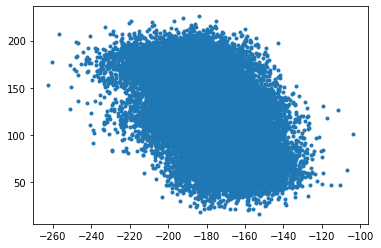

In [22]:
plt.plot(np.real(Sy1[::100]), np.imag(Sy1[::100]),'.')
plt.show()

In [23]:
y1 = kmeans.predict(d1)

In [24]:
list(y).count(1)/len(y)

0.4924169194360188

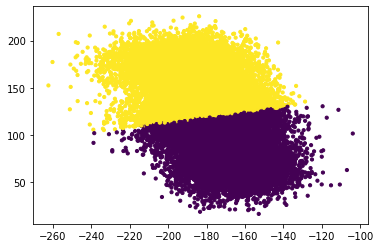

In [25]:
plt.scatter(x1,z1,c=y1,s=10)
plt.show()

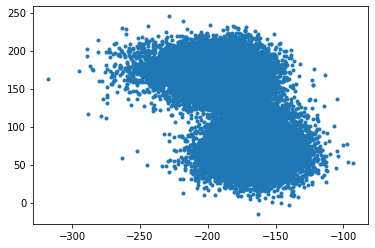

In [38]:
plt.plot(x,z,'.')
plt.show()

# 数据处理

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
data1 = np.load(r'D:\QuLabData\RTO_191117_172705.npz')
chA1, chB1 = data1['chA'], data['chB']
S1 = chA1+1j*chB1
Sx1 = S1[::2,0] 
Sy1 = S1[1::2,0] 

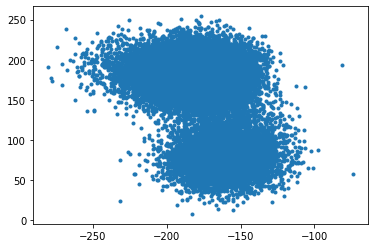

In [39]:
plt.plot(np.real(Sx1[::100]),np.imag(Sx1[::100]),'.')
plt.show()

In [40]:
phi = np.arctan(Sy1/Sx1)

<IPython.core.display.Javascript object>


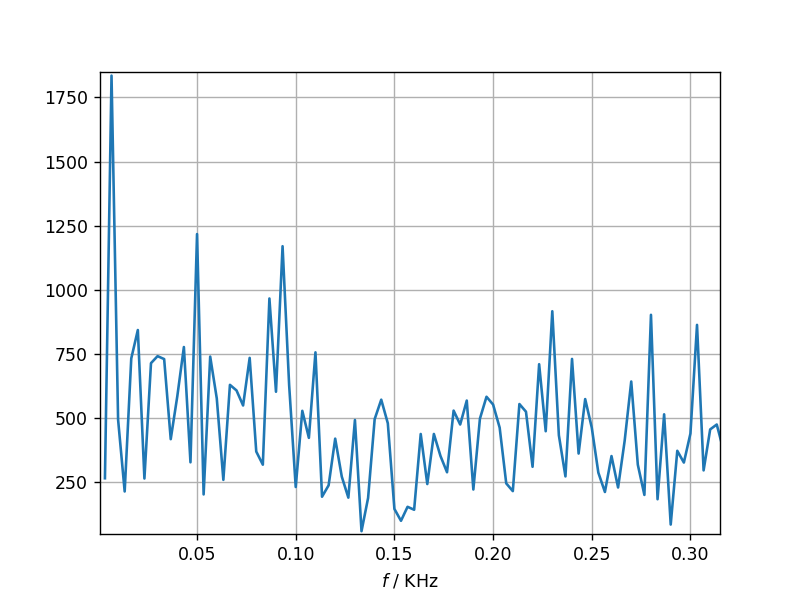

In [48]:
%matplotlib notebook

s = np.fft.fftshift(np.fft.fft(phi))
f = np.fft.fftshift(np.fft.fftfreq(len(phi))*10e3)

plt.figure()
plt.plot(f[f>0][:1000], np.abs(s[f>0])[:1000])
plt.grid(which='both')
plt.xlabel(r'$f$ / KHz')
plt.show()